In [30]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Draw

In [2]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")

In [6]:
mols = [m for m in suppl if m]

RDKit WARNING: [12:16:40]  S group DAT ignored on line 2516
RDKit WARNING: [12:16:40]  S group DAT ignored on line 2516
RDKit WARNING: [12:16:40]  S group DAT ignored on line 2516
RDKit WARNING: [12:16:40]  S group DAT ignored on line 2516
RDKit WARNING: [12:16:40]  S group DAT ignored on line 15552
RDKit WARNING: [12:16:40]  S group DAT ignored on line 15552
RDKit WARNING: [12:16:40]  S group DAT ignored on line 15552
RDKit WARNING: [12:16:40]  S group DAT ignored on line 15552
RDKit ERROR: [12:14:30] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:16:40] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:16:40] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [12:16:40] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [12:16:40] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [12:16:40]  S group GEN ignored on line 102860
RDKit ERROR: [12:16:40] ERROR: Explici

RDKit ERROR: [12:16:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:16:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [12:16:41] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [12:16:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [12:16:41] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [12:16:41] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [12:16:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [12:16:41] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [12:16:41] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [12:16:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [12:16:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERRO

RDKit ERROR: [12:16:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:16:42]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [12:16:42] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [12:16:42] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [12:16:42] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [12:16:43]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [12:16:43] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:16:43] ERROR: Could not sanitize molecule ending on line 1151592


In [8]:
len(mols)

7110

In [27]:
def lipinski_molwt(m):
    return Descriptors.ExactMolWt(m) <= 500

def lipinski_logp(m):
    return Descriptors.MolLogP(m) < 5

def lipinski_hbd(m):
    return Lipinski.NumHDonors(m) <= 5

def lipinski_hba(m):
    return Lipinski.NumHAcceptors(m) <= 10

def lipinski(m):
    return sum((lipinski_molwt(m), lipinski_logp(m), lipinski_hbd(m), lipinski_hba(m))) > 2

In [28]:
lippass = [lipinski(m) for m in mols]
len(lippass), lippass[0:10]

(7110, [False, False, False, False, False, False, False, True, False, True])

In [29]:
len([i for i in lippass if i])

6382

In [42]:
mols[1].GetProp('GENERIC_NAME')

'Goserelin'

In [45]:
failed = [m for m, lip in zip(mols, lippass) if not lip]

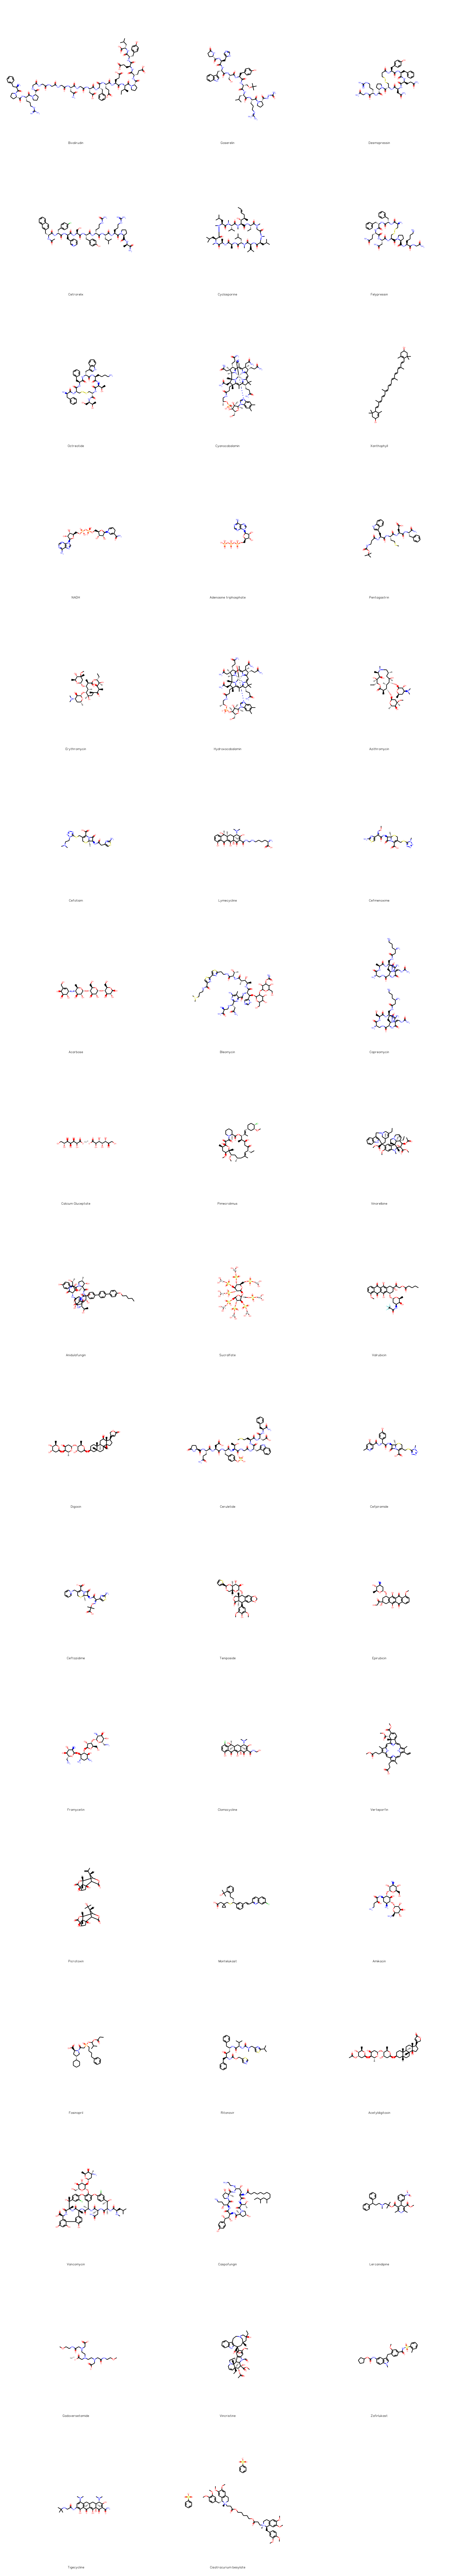

In [47]:
Draw.MolsToGridImage(failed, subImgSize=(500, 500), legends=[m.GetProp('GENERIC_NAME') for m in failed])